In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("water_potability.csv")

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [4]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [5]:
df = df.dropna()
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [6]:
name=df["Potability"].value_counts().index
counts=df["Potability"].value_counts().values

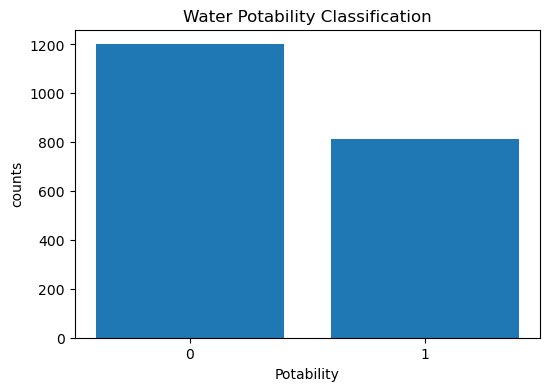

In [7]:
plt.figure(figsize=(6,4))
plt.bar(x=name.astype(str),height=counts)
plt.title("Water Potability Classification")
plt.xlabel("Potability")
plt.ylabel("counts")
plt.savefig("plot.png")
plt.show()

In [8]:
X=df.drop(columns=["Potability"])
y=df['Potability']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [10]:
X_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
501,5.842933,168.295287,19156.123132,6.878348,331.477649,506.756808,14.526151,80.423715,4.143225
503,5.345887,184.784575,22274.368372,9.727103,319.030495,492.135489,11.894673,87.297686,2.950361
1508,7.958871,184.828557,26845.661013,7.673719,327.239109,389.264216,11.032867,52.510520,4.007903
917,7.592672,177.080839,14912.225506,6.041144,349.240614,355.284442,17.161966,42.115257,3.341427
1435,5.198225,173.119821,11178.403544,5.893458,343.209876,390.065616,14.160899,65.433008,3.807318


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [12]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("accuracy=",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy= 0.5682382133995038
              precision    recall  f1-score   support

           0       0.65      0.68      0.67       257
           1       0.40      0.36      0.38       146

    accuracy                           0.57       403
   macro avg       0.52      0.52      0.52       403
weighted avg       0.56      0.57      0.56       403



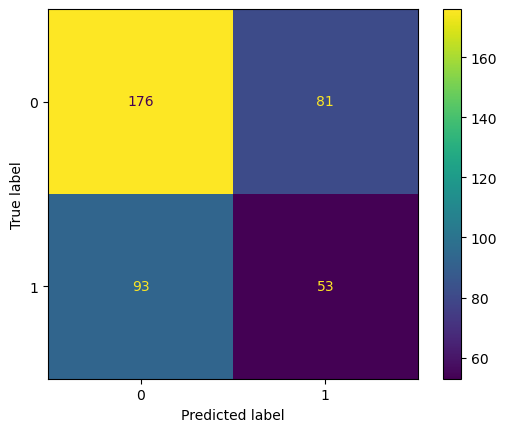

In [13]:
cm=confusion_matrix(y_test,y_pred)
cm_plot=ConfusionMatrixDisplay(cm,display_labels=df["Potability"].unique())
cm_plot.plot()
plt.savefig("confusionmatrix.png")

In [14]:
test_pred=knn.predict([X_test.iloc[0]])
print(test_pred[0])

0


/opt/anaconda3/envs/ai/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [15]:
import joblib
joblib.dump(knn,"model.joblib")
print('success')

success
